## 2021: confusion matrix for reviewers
Inputs: csv files output from classifier.py
Outputs: a few small csv files with confusion matrices, as well as printouts
Note: Actual confusion matrix is calculated in Excel spreadsheet on local: confusion_x10_local-masked_400000_updated.xlsx


In [1]:
# imports
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# display options
pd.options.display.max_columns = 60

In [142]:
## IO
# csv='/home/ethan_kyzivat/code/pixel-smasher/2021_classification_stats_x10_local-masked_400000_ir_global_thresh.csv' # on remote
csv='/mnt/g/Planet/project_data/2021/2021_classification_stats_x10_local-masked_400000_ir_global_thresh.csv' # on local
res='Bic'

plots_dir='/mnt/g/Planet/project_data/2021/figs'


## filter out accuracy_p == 0
# df = df[~np.isnan(df.accuracy_p)] ## see unweighted part
                 
## display
df=pd.read_csv(csv)
df.shape

(8520, 24)

In [3]:
df.describe()

,Unnamed: 0,num,thresh,percent_water,mean_ndwi,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,min_ndwi,max_ndwi,JI,DSC,TP,FN,FP,TN,TP_p,FN_p,FP_p,TN_p
count,8520.0,8520.000000,8520.0,8520.000000,8520.000000,8520.00000,4260.000000,4254.000000,4254.000000,4254.000000,8520.000000,8520.000000,4260.000000,4254.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,0.0,1064.500000,0.0,25.093381,179.488347,197.87770,0.992060,0.500000,0.968830,0.004538,17.591197,254.094718,0.953620,0.023703,56877.698826,1005.830751,823.511737,171692.958685,604.855164,604.855164,515.098592,515.098592
std,0.0,614.914056,0.0,21.365034,44.878384,65.19073,0.020256,0.099311,0.048519,0.147840,13.534430,13.120356,0.057926,0.029073,49065.912291,2983.443671,2356.207596,49589.549631,2009.348918,2009.348918,1132.559844,1132.559844
min,0.0,0.000000,0.0,0.000000,6.350768,1.00000,0.559457,0.000217,0.005591,-0.510651,0.000000,27.000000,0.000000,0.000116,0.000000,0.000000,0.000000,264.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,532.000000,0.0,10.225586,164.147423,205.00000,0.991701,0.426760,0.967128,-0.105574,8.000000,255.000000,0.945380,0.010630,22689.750000,472.000000,360.000000,154157.000000,244.000000,244.000000,229.000000,229.000000
50%,0.0,1064.500000,0.0,18.142578,193.678285,223.00000,0.994058,0.500000,0.976820,0.000000,16.000000,255.000000,0.964400,0.018106,40849.000000,737.000000,588.500000,187823.500000,430.000000,430.000000,378.000000,378.000000
75%,0.0,1597.000000,0.0,32.597114,209.177797,233.00000,0.995956,0.573240,0.983528,0.115438,25.000000,255.000000,0.978919,0.028059,73851.750000,1071.000000,897.000000,206229.750000,688.000000,688.000000,581.000000,581.000000
max,0.0,2129.000000,0.0,99.878906,240.552080,255.00000,1.000000,0.999783,0.996202,0.693504,193.000000,255.000000,0.999769,0.717072,230042.000000,86987.000000,74443.000000,230400.000000,71180.000000,71180.000000,34744.000000,34744.000000


In [4]:
df.query("res == @res").sum().TN_p

1320619.0

# Weighted metrics

In [22]:
## display confusion matrix
## Note: Actual confusion matrix is calculated in Excel spreadsheet on local: confusion_x10_local-masked_400000_updated.xlsx
from IPython.display import display
for res in ['Bic', 'SR']:
    sum=df.query("res == @res").sum()
    CM_total=np.array([[sum.TN, sum.FP],[sum.FN, sum.TP]])
    CM_p_total=np.array([[sum.TN_p, sum.FP_p],[sum.FN_p, sum.TP_p]])
#     CM=CM_total/CM_total.sum()
    CM=CM_total
    CM_p=CM_p_total
    # CM1=np.concatenate((CM, CM.sum(axis=1, keepdims=True)), axis=1) # not right...
    print('\n\nConfusion matrix (weighted) for: ')
    print(res)
    # CM
    cm=pd.DataFrame(CM,columns=[[res]*2,['Not water', 'Water']], index=[['HR']*2,['Not water', 'Water']])
    cm_p=pd.DataFrame(CM_p,columns=[[res]*2,['Not water\'', 'Water\'']], index=[['HR']*2,['Not water\'', 'Water\'']])
    display(cm)
    print(res + ' primed')
    display(cm)
    cm.to_csv('CM_weighted_'+res+'.csv')
    cm_p.to_csv('CM_p_weighted_'+res+'.csv')
    



Confusion matrix (weighted) for: 
Bic


Bic             
                Not water        Water
HR Not water  365929461.0    1530621.0
   Water        2322429.0  120969489.0

Bic primed


Bic             
                Not water        Water
HR Not water  365929461.0    1530621.0
   Water        2322429.0  120969489.0



Confusion matrix (weighted) for: 
SR


SR             
                Not water        Water
HR Not water  365482543.0    1977539.0
   Water        1962410.0  121329508.0

SR primed


SR             
                Not water        Water
HR Not water  365482543.0    1977539.0
   Water        1962410.0  121329508.0

## Weighted

In [18]:
## now compute weighted metrics
for res in ['Bic', 'SR']:
    mean=df.query("res == @res").mean()
    print('\n\nMetrics for ' + res)
    met=mean.loc[['accuracy','accuracy_p','kappa','kappa_p', 'JI','DSC']]
    display(met)
    
#     print(res + ' primed')
#     display(cm)



Metrics for Bic


accuracy      0.992149
accuracy_p    0.453289
kappa         0.968239
kappa_p      -0.062710
JI            0.951896
DSC           0.024557
dtype: float64



Metrics for SR


accuracy      0.991972
accuracy_p    0.546711
kappa         0.969422
kappa_p       0.071786
JI            0.955343
DSC           0.022849
dtype: float64

In [19]:
mean.accuracy

0.9919716088778039

In [48]:
mean=df.mean()
mean.kappa, mean.kappa_p
dir(mean)
mean
# mean.shape
# mean.loc[['kappa','kappa_p']]

Unnamed: 0            0.000000
num                1064.500000
thresh                0.000000
percent_water        25.093381
mean_ndwi           179.488347
median_ndwi         197.877700
accuracy              0.992060
accuracy_p            0.500000
kappa                 0.968830
kappa_p               0.004538
min_ndwi             17.591197
max_ndwi            254.094718
JI                    0.953620
DSC                   0.023703
TP                56877.698826
FN                 1005.830751
FP                  823.511737
TN               171692.958685
TP_p                604.855164
FN_p                604.855164
FP_p                515.098592
TN_p                515.098592
dtype: float64

# Unweighted metrics

In [147]:
## display confusion matrix
## Note: Actual confusion matrix is calculated in Excel spreadsheet on local: confusion_x10_local-masked_400000_updated.xlsx
from IPython.display import display
for res in ['Bic', 'SR']:
    dff=df.query("res == @res") # filtered
    dff = dff[~np.isnan(dff.accuracy_p)] # filter out no nan accuracy_p
    w=230400/(dff.TP_p+dff.TN_p+dff.FP_p+dff.FN_p) # weights
#     w[w == np.inf]
    mean=pd.Series()
    
    print('\n\nConfusion matrix (unweighted) for: ')
    print(res)
    
    ## CM regular
    mean.TN = np.average(dff.TN, axis=0)
    mean.FP = np.average(dff.FP, axis=0)
    mean.FN = np.average(dff.FN, axis=0)
    mean.TP = np.average(dff.TP, axis=0)
    CM=np.array([[mean.TN, mean.FP],[mean.FN, mean.TP]])             # means instead of means
    cm=pd.DataFrame(CM,columns=[[res]*2,['Not water', 'Water']], index=[['HR']*2,['Not water', 'Water']])
    
    ## cm prime
    mean.TN_p = np.average(dff.TN_p, axis=0, weights=w)
    mean.FP_p = np.average(dff.FP_p, axis=0, weights=w)
    mean.FN_p = np.average(dff.FN_p, axis=0, weights=w)
    mean.TP_p = np.average(dff.TP_p, axis=0, weights=w)
    CM_p=np.array([[mean.TN_p, mean.FP_p],[mean.FN_p, mean.TP_p]])    # means instead of sums
    cm_p=pd.DataFrame(CM_p,columns=[[res]*2,['Not water\'', 'Water\'']], index=[['HR']*2,['Not water\'', 'Water\'']])
    display(cm)
    print(res + ' primed')
    display(cm_p)
    cm.to_csv('CM_unweighted_'+res+'.csv')
    cm_p.to_csv('CM_p_unweighted_'+res+'.csv')



Confusion matrix (unweighted) for: 
Bic


Bic              
                  Not water         Water
HR Not water  171715.214386    719.614951
   Water        1091.880113  56873.290550

Bic primed


Bic            
               Not water'      Water'
HR Not water'  347.412426  230.426482
   Water'      455.312651  221.146938



Confusion matrix (unweighted) for: 
SR


SR              
                  Not water         Water
HR Not water  171505.097790    929.731547
   Water         922.618712  57042.551951

SR primed


SR            
               Not water'      Water'
HR Not water'  230.426482  347.412426
   Water'      221.146938  455.312651

In [135]:
np.average(dff.TN_p, axis=0, weights=w)
dff.TN_p
w.shape
np.any(w == np.inf)
np.where(w == np.inf)
(w[w == np.inf]).index
# w ==np.inf
# dff.loc[27,:]
# dff
dff.loc[108,:]

Unnamed: 0                                                 0
num                                                       27
name             20170710_181144_1034_3B_AnalyticMS_SR_s0100
thresh                                                     0
res                                                       SR
percent_water                                              0
mean_ndwi                                            211.964
median_ndwi                                              213
accuracy                                                   1
accuracy_p                                               NaN
kappa                                                    NaN
kappa_p                                                  NaN
min_ndwi                                                  27
max_ndwi                                                 255
JI                                                         0
DSC                                                      NaN
TP                      

In [146]:
w
dff.TP_p+dff.TN_p+dff.FP_p+dff.FN_p
dff.TP+dff.TN+dff.FP+dff.FN
np.any(230400/w == np.inf)
# np.histogram(pd.DataFrame(230400/w))
# w
# np.where( w == 0) 
df[df.accuracy_p == np.nan]
dff[dff.accuracy_p == np.nan]
np.isnan(dff.loc[108,:].accuracy_p)
dff[~np.isnan(dff.accuracy_p)]
dff[np.isnan(dff.accuracy_p)]

,Unnamed: 0,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,accuracy,accuracy_p,kappa,kappa_p,min_ndwi,max_ndwi,JI,DSC,TP,FN,FP,TN,TP_p,FN_p,FP_p,TN_p
108,0,27,20170710_181144_1034_3B_AnalyticMS_SR_s0100,0.0,SR,0.0,211.96436,213.0,1.0,NaN,NaN,NaN,27.0,255.0,0.0,NaN,0.0,0.0,0.0,230400.0,0.0,0.0,0.0,0.0
928,0,232,20170709_180724_1030_3B_AnalyticMS_SR_s0130,0.0,SR,0.0,238.12465,243.0,1.0,NaN,NaN,NaN,113.0,255.0,0.0,NaN,0.0,0.0,0.0,230400.0,0.0,0.0,0.0,0.0
3024,0,756,20170709_180724_1030_3B_AnalyticMS_SR_s0112,0.0,SR,0.0,228.57143,228.0,1.0,NaN,NaN,NaN,122.0,255.0,0.0,NaN,0.0,0.0,0.0,230400.0,0.0,0.0,0.0,0.0


In [37]:
dff=df.query("res == @res") # filtered
np.average(dff.TN, axis=0, weights=dff.TP_p+dff.TN_p+dff.FP_p+dff.FN_p)
# dff.TP_p+dff.TN_p+dff.FP_p+dff.FN_p

151213.88510801608

In [52]:
mean=pd.Series()
mean.foo=1
mean.doo=2
mean.foo


1

# Histograms

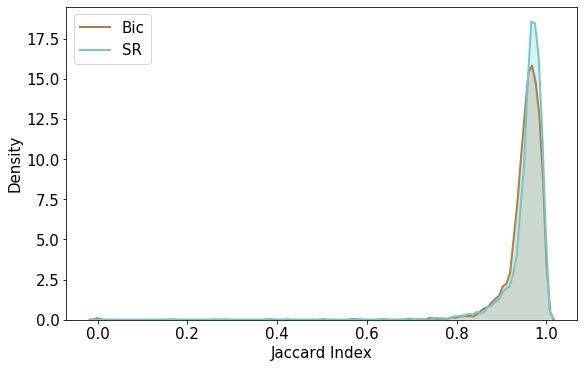

In [17]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

## options
fs=15 # font
a=0.75 # alpha

## Density plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.distplot(df.query("res == 'Bic'").JI, hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(df.query("res == 'SR'").JI, hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper left", fontsize=fs)
ax.set_xlabel('Jaccard Index', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_JI_kde1.png'), dpi=300)

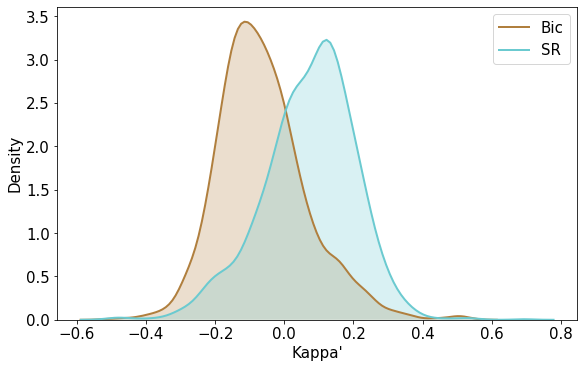

In [15]:
# Density Plot and Histogram # from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

## options
fs=15 # font
a=0.75 # alpha

## Density plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
sns.distplot(df.query("res == 'Bic'").kappa_p, hist=False, kde=True, ax=ax, label='Bic',
             bins=int(180/5), color = '#B07F3E', 
             hist_kws={'edgecolor':'#B07F3E'},
             kde_kws={'linewidth': 2, 'shade':'True'})
sns.distplot(df.query("res == 'SR'").kappa_p, hist=False, kde=True, ax=ax, label='SR',
             bins=int(180/5), color = '#6BCAD0', 
             hist_kws={'edgecolor':'#6BCAD0'},
             kde_kws={'linewidth': 2, 'shade':'True'})

    # look nice
# ax.legend(fontsize=fs)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
ax.legend(loc="upper right", fontsize=fs)
ax.set_xlabel('Kappa\'', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)

    # save
fig.savefig(os.path.join(plots_dir, 'plot_hist_kappa_p_kde1.png'), dpi=300)